<a href="https://colab.research.google.com/github/rafaelrodolfon/analytic/blob/main/An%C3%A1lise%20de%20Modelos%20para%20Proje%C3%A7%C3%A3o%20de%20Desemprego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


****O trabalho dignifica o ser humano e é fundamental para a convivência na sociedade, sendo um dos pilares do desenvolvimento nacional. No entanto, ainda há parcelas da população que enfrentam dificuldades de acesso ao mercado de trabalho. Neste projeto, serão analisadas algumas variáveis que podem influenciar o desemprego ou a desocupação dessa população, com o objetivo de criar um modelo para estimar o desemprego. Utilizaremos dados extraídos da biblioteca do IPEA e informações sobre o PIB mensal obtidas no site do IBGE.****
```



 ** 1 - Importação das Bibliotecas e Instação do Ipeadatapy **

In [ ]:
! pip install ipeadatapy

  Importação as bibliotecas a qual iremos utilizar neste projeto

In [ ]:
import ipeadatapy as ipea
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

Uploud do XLSX no qual consta as inforrmações do PIB mensal que foram extraidos do IBGE

In [324]:
from google.colab import files

uploaded = files.upload()


Saving PIB.xlsx to PIB (6).xlsx


Seleção dos Dados Para Elaboração do Dataset

In [ ]:
#lista das Tabelas do IpeaData
#ipea.list_series()

In [ ]:
 #	PIB - taxa de investimento - preços correntes - Valores Mensais

 pib = pd.read_excel('PIB.xlsx')

 # Consumo de Energia Valores em (R$)

 CEC = ipea.timeseries('ELETRO12_CEETCOM12') # Comércio

 CEI = ipea.timeseries('ELETRO12_CEETIND12') # Industria

 # População Desocupada Numero de Pessoas

 População_desocupada = ipea.timeseries('PMEN12_QDESPOC12')

 # Taxa de Desemprego Valor %

 t_desemprego = ipea.timeseries('PMEN12_PNEAPRO12')

 #indice de expectativa do consumido
 ipca = ipea.timeseries('PRECOS12_IPCA12')

 #indice de expectativa do consumido
 iec = ipea.timeseries('FCESP12_IICF12')

 #Índice de Confiança do Empresário Industrial
 icei = ipea.timeseries('CNI12_ICEIGER12')

 #indice de confiança do consumido
 t_icc = ipea.timeseries('FCESP12_IIC12')

**# 2 - Tratamento de Dados**

In [ ]:
# Removendo caracteres não numéricos das colunas dos Dataframe
t_desemprego = t_desemprego.drop(columns=['RAW DATE', 'CODE','DAY'])

CEC = CEC.drop(columns=['RAW DATE', 'CODE','DAY'])

CEI = CEI.drop(columns=['RAW DATE', 'CODE','DAY'])

População_desocupada = População_desocupada.drop(columns=['RAW DATE', 'CODE','DAY'])

ipca = ipca.drop(columns=['RAW DATE', 'CODE','DAY'])

iec = iec.drop(columns=['RAW DATE', 'CODE','DAY'])

icei = icei.drop(columns=['RAW DATE', 'CODE','DAY'])

t_icc = t_icc.drop(columns=['RAW DATE', 'CODE','DAY'])

In [ ]:
# Renomeando as Colunas de modo a facilitar a compreenssão

t_desemprego.rename(columns={'VALUE ((%))': 'DESEMPREGO'}, inplace=True)

CEC.rename(columns={'VALUE (R$)': 'Energia_Comercio'}, inplace=True)

CEI.rename(columns={'VALUE (R$)': 'Energia_Industria'}, inplace=True)

População_desocupada.rename(columns={'VALUE (Pessoa)': 'Pop_desocupada'}, inplace=True)

iec.rename(columns={'VALUE (-)': 'iec'}, inplace=True)

ipca.rename(columns={'VALUE (-)': 'IPCA'}, inplace=True)

t_icc.rename(columns={'VALUE (-)': 'ICC'}, inplace=True)

In [ ]:
# Copilando o Dataframe

df = pd.merge(t_desemprego,pib, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,CEC, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,CEI, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,População_desocupada, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,iec, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,ipca, on=['YEAR','MONTH'], how = 'inner')

df = pd.merge(df,t_icc, on=['YEAR','MONTH'], how = 'inner')

 ***3 - Análise de Variaveis***

In [ ]:
df_analise = df.drop(columns=['MONTH', 'YEAR','Data'])

In [ ]:
df

,MONTH,YEAR,DESEMPREGO,Data,PIB,Energia_Comercio,Energia_Industria,Pop_desocupada,iec,IPCA,ICC
0,3,2002,5.0,2002.03,118444.7,175.867328,97.078356,2606.147,100.37,1839.61,91.30
1,4,2002,4.7,2002.04,120385.9,176.326887,98.066381,2527.806,110.41,1854.33,96.00
2,5,2002,4.6,2002.05,123552.5,183.148061,105.328523,2391.017,110.25,1858.22,96.15
3,6,2002,4.7,2002.06,123424.4,184.779603,105.173685,2335.000,96.27,1866.02,84.40
4,7,2002,4.8,2002.07,126856.6,185.927464,105.982287,2415.265,104.91,1888.23,93.81
...,...,...,...,...,...,...,...,...,...,...,...
163,10,2015,1.9,2015.10,518828.9,441.186804,396.323858,1958.308,110.57,4405.95,88.77
164,11,2015,1.8,2015.11,513819.8,444.705980,400.596740,1874.000,106.38,4450.45,85.55
165,12,2015,1.7,2015.12,521918.7,450.937646,408.766776,1733.000,106.65,4493.17,87.17
166,1,2016,1.5,2016.01,490284.0,451.609975,412.895769,1879.000,110.34,4550.23,89.04


NameError: name 'plt' is not defined

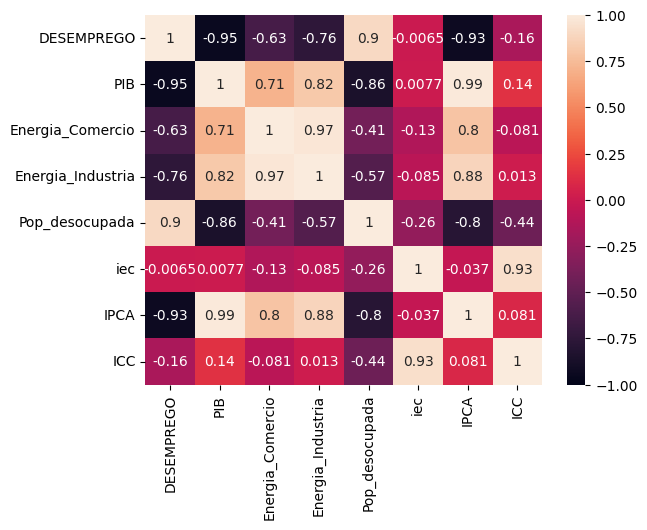

In [ ]:
sns.heatmap(df_analise.corr(), annot=True, vmin=-1, vmax=1)
plt.show()


** 3.1 - Diante dos índices de correlação apresentados acima, foram selecionados os dados do PIB, consumo médio de energia do comércio, consumo médio de energia da indústria e IPCA como variáveis independentes que explicam a quantidade de população desocupada.**

# **# 4 - Aplicação dos Modelos**

4.1 - Importação dos Modelos

In [339]:
# Importação da separação de treino e teste
from sklearn.model_selection import train_test_split

# Impotação dos Modelos Aplicados
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [328]:
x = df[['IPCA','Energia_Industria','Energia_Comercio','PIB',]]
y = df['Pop_desocupada']

[x_train, x_test, y_train, y_test] = train_test_split(x,y,test_size= 0.2 , random_state=91)

4.1.1 - Aplicação do Modelo de RandomForest

In [338]:
modelo = RandomForestRegressor(n_estimators=500,n_jobs=-1, random_state=0)
x = x_train
y = y_train
modelo.fit(x,y)

previsoes_RF = modelo.predict(x_test)


4.1.2 - Aplicação do Modelo Arvore de Regressão

In [ ]:
modelo_arvore_regressao = DecisionTreeRegressor()
modelo_arvore_regressao.fit(x_train, y_train)
previsoes_tree = modelo_arvore_regressao.predict(x_test)

4.1.3 - Aplicação do Modelo de KNeighbors

In [ ]:
modelo_knn_regressor = KNeighborsRegressor(n_neighbors=10)
modelo_knn_regressor.fit(x_train, y_train)
previsoes_knn = modelo_knn_regressor.predict(x_test)

4.1.4 - Aplicação do Modelo SVM

In [ ]:
modelo_svm_regressao = svm.SVR()
modelo_svm_regressao.fit(x_train, y_train)
previsoes_svm = modelo_svm_regressao.predict(x_test)

4.1.4 - Aplicação do Modelo BaggingRegressor

In [348]:
bagging_reg = BaggingRegressor(n_estimators=100, random_state=42)
bagging_reg.fit(x_train, y_train)
previsoes_bagging = bagging_reg.predict(x_test)

5 - Análise dos Resultados dos Modelos

In [349]:
df_resultado = pd.DataFrame({'Resultado':y_test,'knn': previsoes_knn, 'svm': previsoes_svm, 'tree':previsoes_tree,'rf':previsoes_RF,'bagging':previsoes_bagging })

In [350]:
df_resultado.sort_index()
df_resultado

,Resultado,knn,svm,tree,rf,bagging
137,1324.219,1293.5939,1880.257011,1397.047,1380.590554,1388.19239
20,2665.410,2606.6598,1932.665609,2841.100,2748.055532,2758.70183
140,1155.293,1233.8976,1879.391285,1299.887,1268.981552,1278.00179
104,1386.913,1475.9653,1893.552845,1452.221,1499.534550,1487.66761
11,2437.828,2440.9658,1934.847498,2164.771,2361.986364,2391.44906
41,2076.384,2170.6820,1928.121194,2047.086,2073.113640,2064.17563
109,1573.735,1498.7971,1895.045045,1452.221,1536.846032,1534.89070
23,2575.915,2597.1005,1933.807758,2870.970,2631.215786,2632.84091
4,2415.265,2421.6472,1935.205800,2420.289,2386.503360,2382.80354
60,2325.745,2224.5848,1922.880595,2317.108,2142.051156,2165.58416


<Axes: >

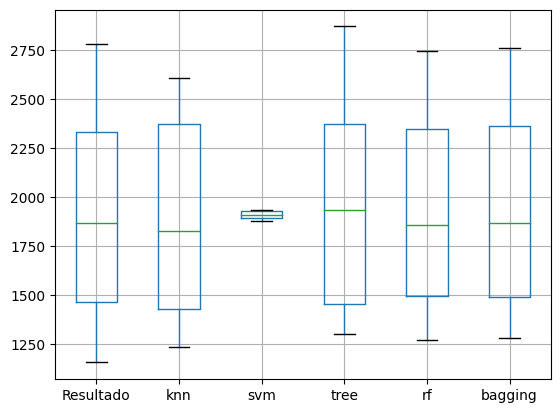

In [351]:
df_resultado.boxplot()

In [352]:
fig = px.scatter(df_resultado, y=df_resultado.columns, title='Dispersão entre Valores Reais e Previstos')
fig.show()


5.1 Cálculo do R²

In [358]:
r2_knn = r2_score(df_resultado['Resultado'], df_resultado['knn'])

r2_svm = r2_score(df_resultado['Resultado'], df_resultado['svm'])

r2_tree = r2_score(df_resultado['Resultado'], df_resultado['tree'])

r2_rf = r2_score(df_resultado['Resultado'], df_resultado['rf'])

r2_bagging = r2_score(df_resultado['Resultado'], df_resultado['bagging'])

r2 = pd.DataFrame({'knn': [r2_knn], 'svm': [r2_svm], 'tree': [r2_tree], 'rf': [r2_rf],'bagging':[r2_bagging]})
r2

,knn,svm,tree,rf,bagging
0,0.95573,0.078286,0.917585,0.968036,0.969197


5.2 Cálculo do MSE

In [357]:
mse_knn = mean_squared_error(df_resultado['Resultado'], df_resultado['knn'])

mse_svm = mean_squared_error(df_resultado['Resultado'], df_resultado['svm'])

mse_tree = mean_squared_error(df_resultado['Resultado'], df_resultado['tree'])

mse_rf = mean_squared_error(df_resultado['Resultado'], df_resultado['rf'])

mse_bagging = mean_squared_error(df_resultado['Resultado'], df_resultado['bagging'])

mse = pd.DataFrame({'knn': [r2_knn], 'svm': [r2_svm], 'tree': [r2_tree], 'rf': [r2_rf], 'bagging': [mse_bagging]})

mse

,knn,svm,tree,rf,bagging
0,0.95573,0.078286,0.917585,0.968036,6877.175519


5.3 Média

In [355]:
df_resultado.mean()

Resultado    1919.671029
knn          1893.147956
svm          1909.434983
tree         1953.937529
rf           1915.081789
bagging      1918.193928
dtype: float64

# 6 - o melhor modelo encontrado foi o de Bagging com R² mas proximo de 1 do que os outros modelos alem de uma distribuição e media mais proximo do resultado observado, deste modo é possivel determinar os nives de desmprego, quem sabe com isentivos governamentais projetar uma redução do demprego dando recurso para geração de energia e reduzindo a inflação para um maior crecimento do pib

Definição do Problema : Encontrar o melhor modelo que encontre a quantidade mais proxima de desempregados

Você tem premissas ou hipóteses sobre o problema? Quais?
Que é possivel determina a quantidade  de desmpregados com base nos gasto de energia, do crecimento do pib

Que restrições ou condições foram impostas para selecionar os dados?
foi utilizado o periodo de 2002 ate 2016 pois esta sendo trabalhado dados reais os quais faz parte de uma serie que ja foi interrompida alguns dos dados.